---
# Change of Variables

### Schwartz streamlined STA410 course notes May 11 (2022)

---

For transformation $g$ univariate ${Z}\sim \tilde p_{Z}({Z}={z})$

$${X}=g({Z}) \quad \Longrightarrow \quad p_{X}({X}={x}) \quad=\quad \tilde p_{Z}\big(\underbrace{g^{-1}({x})}_{{z}}\big) \left| \frac{d}{dx} g^{-1}(x) \right| \quad=\quad \tilde p_{Z}\big(\underbrace{g^{-1}({x})}_{{z}}\big) \left| \frac{d}{dx} g(x) \right|^{-1}$$

and for multivariate $Z$

$$\begin{align*}
& {} p_{X}({x}) \quad=\quad  \tilde p_{Z}\big(\underbrace{g^{-1}({x})}_{{z}}\big) \left| \det J_{g^{-1}(\dot{{x}})}\!\left({x}\right) \right| \quad=\quad \tilde p_{Z}\big(\underbrace{g^{-1}({x})}_{{z}}\big) \left| \det J_{g(\dot{{z}})}\!\left({z}\right) \right|^{-1}\\
=\quad & {}  \tilde p_{Z}\big(g^{-1}({x})\big) \left| \; \det \left[ \begin{array}{ccc} \frac{\partial g^{-1}_1({x})}{\partial x_1} &\cdots &  \frac{\partial g^{-1}_1({x})}{\partial x_m} \\ \vdots & \ddots & \vdots \\ \frac{\partial g^{-1}_m({x})}{\partial x_1} &\cdots &  \frac{\partial g^{-1}_m({x})}{\partial x_m}\end{array} \right] \quad \right| \quad=\quad \tilde p_{Z}\big(g^{-1}({x})\big) \;\! \left| \; \det \left[ \begin{array}{ccc} \frac{\partial g_1({z})}{\partial z_1} &\cdots &  \frac{\partial g_1({z})}{\partial z_m} \\ \vdots & \ddots & \vdots \\ \frac{\partial g_m({z})}{\partial z_1} &\cdots &  \frac{\partial g_m({z})}{\partial z_m}\end{array} \right] \quad \right|^{-1}
\end{align*}$$

which implies the familiar requirements 

1. $\dim(X) = \dim(Z)$
2. $g$ is monotonic so $g^{-1}$ exists
3. $g$ is sufficiently smooth for differentiation

> In automatic differentiation computational frameworks such as TensorFlow, an object which can perform the functionalities associated with the change of variables formulation is typically referred to as a ***bijection***.   We will eventually replace the phrase "change of variables" with the term ***bijection***, but not immediately.

## Jacobians

A careful look at the Jacobian in the change of variables context reveals that it captures the instantaneous linear transformation (i.e., relative change) between $Z$ and and $X$ under the transformation $g$.  When computing areas the domain of the integral matters.  If a function is being spread out over more (or less) of the (absolute) domain, the integral will of course increase (or decrease).

But if the integral is over a PDF its value MUST be $1$!! But how could this be if the function $g$ is being differentially "spreading out"/"contracting together" the PDF over the space of $X$ compared to the space of $Z$??  In order to ensure that the area under the PDF remains $1$, the height of the PDF must be adjusted (differentially increased/decreased) to counteract the stretching/contracting changes in the domain (of $X$ versus $Z$) over which the PDF is being evaluated. This is what the determinat of the Jacobian of the inverse $g$ function does in the change of variables formula.

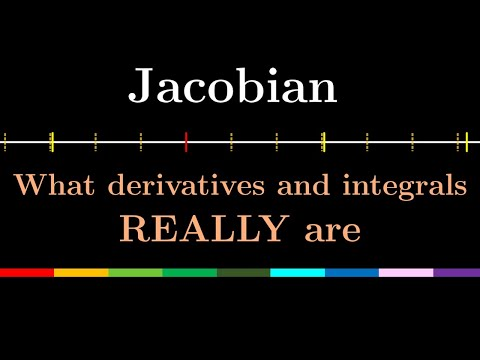

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('wCZ1VEmVjVo')

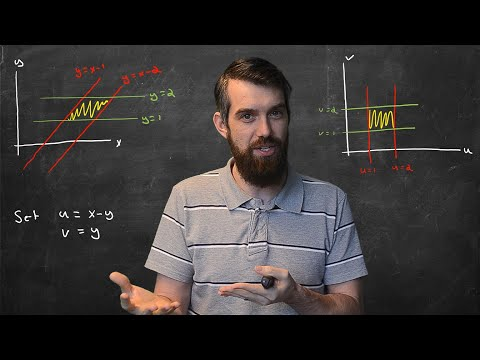

In [3]:
YouTubeVideo('wUF-lyyWpUc')

## Determinants (and Eigenthings)

The ***eigenvectors*** $V_{\cdot j}$ of a ***full rank matrix*** $A_{n \times n}$ form an ***eigenvector basis*** of $I \!\! R^n$ such that any vector in $I \!\! R^n$ may be expressed as $\displaystyle x = \sum_{j} c_j V_{\cdot j}$.

The corresponding ***eigenvalues*** $\lambda_i$ of $A_{n \times n}$ thus characterize the multiplicative expansion/contraction of points $x \ \in I \!\! R^n$ under the linear transformation of $A_{n \times n}$ along each of the ***eigenvectors*** $V_{\cdot j}$ directions since

$$Ax= A\left(\sum_{j} c_i V_{\cdot j}\right) = \sum_{j} c_i A  V_{\cdot j} = \sum_{j} c_i \lambda_j V_{\cdot j}$$

The product of the ***eigenvalues*** of $A_{n \times n}$ thus defines the global expansion/contraction of points $x \ \in I \!\! R^n$ under the linear transformation of $A_{n \times n}$. Thus, since 

$$\det(A_{n\times n}) = \prod_{i=1}^n \lambda_i \quad\quad \left(\text{not to be confused with $\quad |\det(A_{n\times n})\,| = \prod_{i=1}^n \lambda_i^{\text{svd}}\quad$ for singular values $\lambda_i^{\text{svd}}$} \right)$$

the ***determinant*** of $A_{n \times n}$ defines the global expansion/contraction of points $x \ \in I \!\! R^n$ under the linear transformation of $A_{n \times n}$, thus, defining a very meaningful geometric property of a 
linear transformation.

> Since, the ***Jacobian*** in the ***change of varaibles*** context captures the linear transformation of the domains of $X$ relative to $Z$ at each location of $X$ (and $Z$), the ***determinant*** of the ***Jacobian*** captures resulting change in (domain) area, and is corrected for by the ***change of varaibles*** formulation. So, perhaps despite initially seeming unintuitive, the ***change of varaibles*** formula is in fact a quite literal specification of what is required to maintain the ability to evaluate a PDF under a ***smooth monotonic transformation***.

## Balancing Transformation and Computation with Flows

Computing eigenvalues (in order to compute a determinant) requires an eigendecomposition or similar.  This is a computationally prohibitive operation for an arbitrary matrix $A_{n\times n}$; however, for triangular matrices $L$ or $U$ the determinant is simply the product of the diagonal elements of the matrix.

Thus, if the transformation $g$ is designed so that the Jacobian of $g^{-1}$ (or $g$) is a triangular matrix, then the Jocobian computation will likely not be a limiting computational factor.  Of course, transformations $g$ created with such intentional designed limitations are likely to be somewhat simple.

The solution is to thus use a sequence of simple transformations which together form an extremely flexible transformation function (despite having limited individual transformation capability). In this context, change of variables can be repeatedly applied, meaning that a sequnce of transformed distributions can be defined on the basis of a single initial distribution. Thus, for $X^{(k)} = g^{(k)}(X^{(k-1)})$

\begin{align*}
p_{X^{(k)}}(X^{(k)}) = {} & p_{X^{(k-1)}}\big({g^{(k)}}^{-1}\!\!\left(X^{(k)}\right)\big) \left| \det J_{{g^{(k)}}^{-1}(\dot{X^{(k)}})}\!\left(X^{(k)}\right) \right|
=  p_{X^{(k-1)}}\big({g^{(k)}}^{-1}\!\!\left(X^{(k)}\right)\big) \, \left| \det J_{{g^{(k)}}(\dot{X^{(k-1)}})}\!\left(X^{(k-1)}\right) \right|^{-1}\\
= {} & \tilde p_{X^{(0)}}\big(
X^{(0)} = {g^{(k)}}^{-1} \circ {g^{(k-1)}}^{-1} \circ \cdots \circ {g^{(2)}}^{-1} \circ {g^{(1)}}^{-1}( X^{(k)})
\big) \prod_{j=1}^k \left| \det J_{{g^{(j)}}^{-1}(\dot{X^{(j)}})}\!\left(X^{(j)}\right) \right|\\
= {} & \tilde p_{X^{(0)}}\big( 
X^{(0)} = {g^{(k)}}^{-1} \circ {g^{(k-1)}}^{-1} \circ \cdots \circ {g^{(2)}}^{-1} \circ {g^{(1)}}^{-1}( X^{(k)})
\big) \prod_{j=1}^k \left| \det J_{{g^{(j)}}(\dot{X^{(j-1)}})}\!\left(X^{(j-1)}\right) \right|^{-1}
\end{align*}

and all that remains complete the recursive specification and define this so-called ***flow*** is the selection of the base $\tilde p_{X^{(0)}}(X^{(0)})$.

Most commonly this is chosen to be $X^{(0)} \sim N(\mathbf{0},\mathbf{I})$, which eponymously completes the term 
***normalizing flow*** (since they can "normalize" $X^{(k)}$) that is most often used to refer to sequences of change of variables methodologies, and which we ourselves use to generally refer to this class of (transformation) models.

Since we have now adopted the term ***normalizing flow*** over the phrase "sequence of change of variables transformations", let us complete the adoption of alternative terminology and exchange the phrase "change of variables" for its (neural network) counterpart of ***bijection***.  As noted previously, a ***bijection*** is an object (in an automatic differentiation computational framework such as TensorFlow), which provides "change of variables" functionality. This means a ***bijection*** knows its $g$, $g^{-1}$, and the (log) [of the absolute value of the] determinant of the Jacobian of (typically) $g^{-1}$, which further means that a ***bijection*** can forward and reverse transform, as well as compute PDF values on the basis of the change of variables math.

## Masked Autoencoder Density Estimation (MADE)

Before introducing a neural network (NN) methodology designed to construct a normalizing flow with our preferred transformational characteristics, let us first refresh our thinking on how a NN may be transformed into a PDF.

If we define $p$ to be a univariate parametric PDF for the random variable $X_k$ indexed (i.e., parameterized) by the output $\theta$ of a NN whose inputs are $(x_1,\cdots,x_{k-1})$ then defining 

$$p_{X_k|X_{k-1}, \cdots, X_1}(x_k|x_1,\cdots,x_{k-1}) = p_{\theta_k(x_1,\cdots,x_{k-1})}(x_k)$$ 

is a valid distributional assumption that achieves it's stated conditional independence specification. 

By further defining an analogously specified sequence of conditional distributions constructing a complete ***autoregressively paratermized*** dependence structure, the joint distribution model for the multivariate random variable $(X_1,\cdots,X_{k})$ can be constructed uisng the ***chain rule*** as

$$\begin{align*}
p(x_1, \cdots, x_k) = {} & \prod_{j=1}^k p_{X_j|X_{j-1},\cdots,X_1}(x_j|x_{j-1},\cdots,x_1) = \prod_{j=1}^k p_{\theta_j(x_1,\cdots,x_{j-1})}(x_j)
\end{align*}$$

> The outputs of a NN can be the parameters defining a PDF (or PMF); thus, a NN may "output" a distribution.
> Through the intentional construction of an ***autoregressive*** NN structure via ***masking*** (i.e., cutting NN dependency to induce the intended conditional independence) a joint distribution may be reconstructed based on its ***chain rule*** components each defined by an appropriately conditionally independent neural network.
>
> - Actually, this can be done simultaneously in parallel with different outputs of same NN defining respective ***chain rule*** components based on their conditional use of the input data), i.e., only inputs $(x_1,\cdots,x_{k-1})$  are used to define $p_{\theta_k(x_1,\cdots,x_{k-1})}(x_k) = p_{X_k|X_{k-1}, \cdots, X_1}(x_k|x_1,\cdots,x_{k-1})$.
>
> The title ***density estimation*** is of course self-evident. And the term ***autoencoder*** refers to process where data transforms itself based on itself. So, here, $(x_1,\cdots,x_{k})$ is used to define "itself" in that it defines the distribution of its data generating mechanism $(X_1,\cdots,X_{k})$. In this case we would say that the data has been ***autoencoded*** into probability distribution.  
> - Saying $X$ has been ***autoencoded*** is analogous to saying $X$ was transformed into, e.g., it's first principal component using PCA; and, indeed, NN ***autoencoders*** are perhaps most essentially viewed as "nonlinear PCA".  ***Autoencoders*** are a bit more than this as well though, as can be seen in that they can encode into not just latent factors (in the same domain), but into completely different object domains. I.e., here "data" is ***autoencoded*** into a probability distribution.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tfk = tf.keras
tfkl = tfk.layers
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

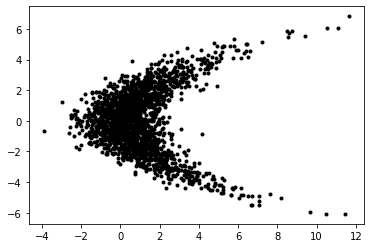

In [5]:
# https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/AutoregressiveNetwork
n = 2000
x2 = np.random.randn(n).astype(dtype=np.float32) * 2.
x1 = np.random.randn(n).astype(dtype=np.float32) + (x2 * x2 / 4.)
# note (1) that it's most informative to condition as p(x2)p(x1|x2)
# note (2) that x1 is more than a shift-scale transformation of x1

data = np.stack([x1,x2], axis=-1)
plt.plot(x1,x2,'k.')

(None, 2)


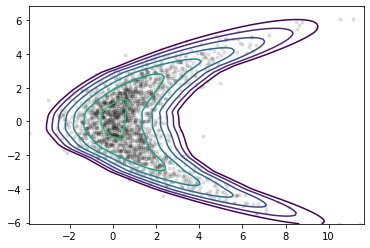

In [45]:
# https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/AutoregressiveNetwork
ARN = tfb.AutoregressiveNetwork(params=2, hidden_units=[25, 25], 
                                activation='relu', input_order='right-to-left')
# Input: (not yet specified); but, it will be 
#        [batch, dimension_of_an_observation] = [n,q]
# Output: count of real-valued autoregressive outputs for each dimension_of_an_observation
#        [n,params,q] = [n,2,q] which can be used as mu_j and log(sigma_j)
#        defining autoregressive conditional distributions p(x_j|x_j-1,...,x_0) = N(mu_j,exp(log_sigma_j)) 
#        i.e., jth entry in params axis depends on inputs j-1,...,0
# Network: (will enforce the Autoregressive property with Masking)
# `hidden_units=[latent_variables, latent_outputs] = [10, 10]` 
# [n, q] x [q, latent_variables] x [latent_variables, transformed_variables] x 
# [transformed_variables, params, q] = [n, params, q]
#  
# note (1) that `input_order='right-to-left'` gets the natural conditioning direction correct
# note (2) that `activation='relu'` allows the neural network to use nonlinear transformations
# e.g., a "v" shape can be made by relu(x2) for x2>0 and relu(-x2) for x2<0; and,
# the "piecewise" feel below is from using differently offset and scaled relu functions 

x_ = tfkl.Input(shape=(2,), dtype=tf.float32) # [n,q]
# In tensorflow `shape=(2,)` specifies the dimension of a single observation (q)
# while `batch` is assumed as the first dimension (`None` will be `n`)
print(x_.shape)
# https://www.tensorflow.org/probability/api_docs/python/tfp/layers/IndependentNormal
MADE = tfk.Sequential([x_, ARN, tfkl.Flatten(data_format='channels_first'), 
                       tfpl.IndependentNormal(2)])
# `tfpl.IndependentNormal(2)` inputs are mu_1, mu_2, log_sigma_1, log_sigma_2 
# but `ARN` output is [[mu_1,log_sigma_1],[mu_2,log_sigma_2]] so
# `data_format='channels_first'` reads the mu's first and then the log_sigma's
# i.e., [i,k,j] iterates in i,j,k order over [n, params, q] and j=0 is mu's

# https://blog.tensorflow.org/2019/03/regression-with-probabilistic-layers-in.html
negloglik = lambda x, p_x: -p_x.log_prob(x)
MADE.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss=negloglik)
MADE.fit(data, data, epochs=20, verbose=False)

g = 100
g1,g2 = np.meshgrid(np.linspace(x1.min(), x1.max(), g), 
                  np.linspace(x2.min(), x2.max(), g))
grid = np.stack([g1.flatten(), g2.flatten()], axis=-1)
plt.plot(x1, x2, 'k.', alpha=0.1)
plt.contour(g1, g2, MADE(grid).log_prob(grid).numpy().reshape(g,g), 
            levels=np.linspace(-7.5,-0.25,10))

The density above is computed as 
- $p_{X_1,X_2}(x_1,x_2) = p_{X_1}(x_1)p_{X_2|X_1}(x_2|x_1) = N(x_1 | \overset{\hat y_1}{\mu_1}, \overset{\hat y_2}{\sigma_1}) N(\overset{\hat y_3}{\mu_2(x_1)}, \overset{\hat y_4}{\sigma_2(x_1)})$

over a grid of $(x_1,x_2)$ and where $(\hat y_1 = \mu_1,\hat y_2=\sigma_1,\hat y_3=\mu_2(x_1),\hat y_4=\sigma_2(x_1))$ are the outputs of a NN conditional on the inputs $(x_1,x_2)$ as notated.

## Masked/Inverse Autoregressive Flows (MAF/IAF)

The MADE methodology above shows that the outputs from a NN can be probability distributions; but, we also know that a NN theoretically provides universal function estimation.  The objective in normalizing flows is to transform
an isotropic multivariate normal distribution into a distribution for some other random variable $X^{(k)}$, where the $k$ in $X^{(k)}$ indicates that the final distribution is arrived at by sequentially applying a series (simple) of change of variables transformations $g^{(1)} \circ g^{(2)} \circ \cdots \circ g^{(k)}$ to a base random variable $X^{(0)}$. So, MAF/IAF uses a NN to approximate each transformation function $g^{(k)}$.

- MADE trains a NN to produce distributions which match the final data well by using the same data in a sequentially conditional (autogregressive) manner to "predict itself" without actually ever exactly doing so.  E.g., MADE never uses $x_1$ to predict $x_1$, but it does use it to predict $x_k$ for $k>1$. By doing this MADE never "cheats" since it doesn't violates the chain rule decomposition of the joint distribution it's ultimately using it's own data to predict.

- MAF/IAF uses the exact same autoregressive "trick" to sequentially conditionally predict each component of the $g^{(k)}_j$ transformation without using the $X^{(k)}_j = g^{(k)}_j(X_j^{(k-1)})$ data it creates. The difference is that this is done repeatedly for each of the $g^{(k)}$ in the sequential series of transformations. I.e.,we now have the $k$ superscript indexing $g^{(k)}$, but the autoregressive dependence is still be over the $j$ (within each $g^{(k)}$).

As with all normalizing flows targetting feasible Jacobian computation, MAF/IAF uses very simple transformations; namely, each transformation is only a scale-shift transformation.  However, the specific scale-shift transformation itself can vary in a sequentially dependent manner according to the autoregressive structure of the NN estimating the transformation, which endows the scale-shift transformation with nonlinear properties that are actually quite flexible

\begin{align*}
\text{MAF} \;\; {} &&&&   \text{IAF} \quad & \\ 
X^{(t)}_0 = {} &  \mu^t_{0} +  \sigma^t_{0} \cdot X^{(t-1)}_0 &&& X^{(t)}_0 = {} &  \mu^t_{0} +  \sigma^t_{0} \cdot X^{(t-1)}_0\\
X^{(t)}_j = g^{(t)}(X^{(t)}_{0:j-1}) = {} & \underset{\text{nonlinear functions, e.g., NNs}}{\underbrace{ \mu^{(t)}_{j}(X^{(t)}_{0:j-1}) +  \sigma^{(t)}_{j}(X^{(t)}_{0:j-1})}_{\text{$ \mu^{(t)}$ and $\sigma^{(t)}$ are autoregressive}}} \cdot  X^{(t-1)}_j  &&& X^{(t)}_j = g^{(t)}(X^{(t-1)}_{0:j-1}) = {} & \underset{\text{nonlinear functions, e.g., NNs}}{\underbrace{ \mu^{(t)}_{j}(X^{(t-1)}_{0:j-1}) + \sigma^{(t)}_{j}(X^{(t-1)}_{0:j-1})}_{\text{$ \mu^{(t)}$ and $ \sigma^{(t)}$ are autoregressive}}} \cdot  X^{(t-1)}_j \\
X^{(t)} = {g^{(t)}}(X^{(t)}) = {} & \boldsymbol \mu_{X^{(t)}}^{(t)} + \text{diag}(\boldsymbol \sigma_{X^{(t)}}^{(t)}) X^{(t)} &&& X^{(t)} = {g^{(t)}}(X^{(t-1)}) = {} & \boldsymbol \mu_{X^{(t-1)}}^{(t)} +  {\text{diag}{(\boldsymbol \sigma_{X^{(t-1)}}^{(t)}}}) X^{(t-1)} \\
X^{(t-1)} = {g^{(t)}}^{-1}(X^{(t)}) = {} & \frac{X^{(t)} - \boldsymbol \mu_{X^{(t)}}^{(t)}}{ {\text{diag}{(\boldsymbol \sigma_{X^{(t)}}^{(t)}}})} &&& X^{(t-1)} = {g^{(t)}}^{-1}(X^{(t)}) = {} & \frac{X^{(t)} - \boldsymbol \mu_{X^{(t-1)}}^{(t)}}{ {\text{diag}{(\boldsymbol \sigma_{X^{(t-1)}}^{(t)}}})}\\
\end{align*}

> The difference between the MAF and IAF lies in the fact that
> - the MAF can parallelize the computation of ${g^{(t)}}^{-1}(X^{(t)})$ since $X^{(t-1)}$ is computed based on currently available $X^{(t)}$
>   > which makes converting ${g^{(1)}}^{-1} \circ \cdots \circ {g^{(t-1)}}^{-1}\circ {g^{(t)}}^{-1}(X^{(t)}) = X^{(0)}$ parallelizable for each ${g^{(k)}}^{-1}$
> - whereas the IAF can parallelize the computation of ${g^{(t)}}(X^{(t-1)})$ since $X^{(t)}$ is computed based on currently available $X^{(t-1)}$
>   > which makes converting ${g^{(t)}} \circ {g^{(t-1)}} \circ \cdots \circ  {g^{(1)}}(X^{(0)}) = X^{(t)}$ parallelizable for each $g^{(k)}$
> 
> The other notable characteristic about the MAF and IAF is that are reparameterized inverses of each other as shown in the "MAF vs IAF" section [here](http://akosiorek.github.io/ml/2018/04/03/norm_flows.html) and demonstrated in the code below.

Because of the scale-shift for of MAF/IAF transformations (even if they can in fact behave nonlinearly), the Jacobians of the transformations, and hence determinants of the Jacobians are extremely simple, i.e., 

$$\text{MAF } J_{{g^{(t)}}^{-1}(X^{(t)})} = J \frac{X^{(t)} - \boldsymbol \mu_{X^{(t)}}^{(t)}}{ {\text{diag}{(\boldsymbol \sigma_{X^{(t)}}^{(t)}}})} = {\text{diag}{(\boldsymbol \sigma_{X^{(t)}}^{(t)}}})^{-1} \quad\quad \text{ and } \quad\quad \text{IAF } J_{{g^{(t)}}^{-1}(X^{(t)})} = J \frac{X^{(t)} - \boldsymbol \mu_{X^{(t-1)}}^{(t)}}{ {\text{diag}{(\boldsymbol \sigma_{X^{(t-1)}}^{(t)}}})} = {\text{diag}{(\boldsymbol \sigma_{X^{(t-1)}}^{(t)}}})^{-1} $$

so 

$$\text{MAF } \log p_{X^{(k)}}(x^{(k)}) = \log p_{X^{(0)}}(x^{(0)}) - \sum_{t=1}^k \log \left |\prod_{j=1}^m  \text{diag}(\boldsymbol \sigma^{(t)}_{x^{(t)}})_{jj} \right| \quad\quad \text{ and } \quad\quad \text{IAF } \log p_{X^{(k)}}(x^{(k)}) = \log p_{X^{(0)}}(x^{(0)}) - \sum_{t=1}^k \log \left |\prod_{j=1}^m  \text{diag}(\boldsymbol \sigma^{(t)}_{x^{(t-1)}})_{jj} \right|$$

and the computational difference comes down to if MAF or IAF needs to generate the sequence $(X^{(0)},X^{(1)}, \cdots, X^{(t)})$ backwards (evaluate a samples PDF value) or forwards (sample).

(None, 2)


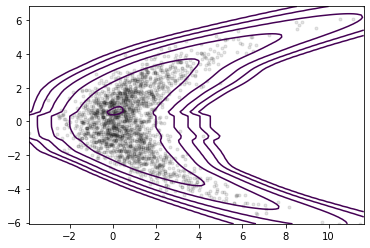

In [49]:
# Rather than parameterizing conditional distributions with 
ARN = tfb.AutoregressiveNetwork(params=2, hidden_units=[512, 512], 
                                activation='relu', input_order='right-to-left')
# this can (equivalently) define a shift-scale transformation 
# of Z_j\sim N(0,1), i.e., Z_j*exp(log_sigma_j))+mu_j for an MAF
# https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/AutoregressiveNetwork
# https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/MaskedAutoregressiveFlow
# https://arxiv.org/abs/1502.03509 # 2015 MADE: masked autoencoder for distribution estimation
# https://arxiv.org/abs/1705.07057 # 2017 masked autoregressive flow for density estimation

# https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/TransformedDistribution
p_X = tfd.TransformedDistribution(
    # `tfd.TransformedDistribution` models x the observed data
    # by p(x) = bijector(p(z)) where `bijector` is learned to transform p(z)
    distribution=tfd.Sample(tfd.Normal(loc=0., scale=1.), sample_shape=[2]), 
    # `distribution` is p(z); but, this need not be a normal distribution
    bijector=tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=ARN))
    # `tfb.MaskedAutoregressiveFlow` defines forward, inverse, and jacobian 
    # of an MAF (i.e., univariate transforms of autoregressive conditionals) 
    # for any `bijector_fn`; but, here we specify that to be a shift-scale
    # transformation with the convenience `shift_and_log_scale_fn` argument   
    # which accepts ARN outputs as inputs to define the shift-scale transform
    
x_ = tfkl.Input(shape=(2,), dtype=tf.float32) # data
print(x_.shape)
log_prob_ = p_X.log_prob(x_) # log p(x) determined by 
# 1. MAF transforming the data to the base distribution p(z)
# 2. computing p(MAF(z)) and all necessary jacobian product corrections
# However, the MAF transform is the shift-scale ARN, which will be an 
# autoregressive neural netwok with input x 
# how to use x autoregressively to transform x into z
MAF = tfk.Model(x_, log_prob_)
# input: x_ is the data
# output: log_prob_ is a function of input x_ so when x_ enters `tfk.Model`
#         it is passed to log_prob_ which calculates based on ARN which has free
#         neural network parameters that may be changed to make improve log_prob_

MAF.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), 
            loss=lambda x, log_prob: -log_prob) # our target log(p(x)=1) is 0
MAF.fit(x=data, y=np.zeros((n, 0), dtype=np.float32),
        batch_size=256, epochs=50, steps_per_epoch=8,  # Usually `n // batch_size`.
        shuffle=True, verbose=False)

plt.plot(x1, x2, 'k.', alpha=0.1)
plt.contour(g1, g2, p_X.prob(grid).numpy().reshape(g,g), 
            levels=np.logspace(-5,2,10))

In [50]:
# https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/MaskedAutoregressiveFlow#examples_3
dims = 100
# defined just like above; except, with different dims
maf = tfd.TransformedDistribution(
    distribution=tfd.Sample(
        tfd.Normal(loc=0., scale=1.), sample_shape=[dims]),
    bijector=tfb.MaskedAutoregressiveFlow(
        shift_and_log_scale_fn=tfb.AutoregressiveNetwork(
            params=2, hidden_units=[25, 25])))

In [51]:
%%time 
x = maf.sample() # Expensive; uses `tf.while_loop`, no Bijector caching.

CPU times: user 596 ms, sys: 93.6 ms, total: 690 ms
Wall time: 939 ms


In [52]:
%%time 
_ = maf.log_prob(x) # Almost free; uses Bijector caching.

CPU times: user 16.5 ms, sys: 2.15 ms, total: 18.6 ms
Wall time: 18.9 ms


In [53]:
%%time
_ = maf.log_prob(tf.zeros(dims)) # Cheap; no `tf.while_loop` despite no Bijector caching.

CPU times: user 24.4 ms, sys: 4.02 ms, total: 28.4 ms
Wall time: 30.4 ms


In [54]:
# https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/MaskedAutoregressiveFlow#examples_3
iaf = tfd.TransformedDistribution(
    distribution=tfd.Sample(
        tfd.Normal(loc=0., scale=1.), sample_shape=[dims]),
            #only this inversion has changed relative to the `maf` object above
            #IAF is indeed appropriately named, as it can be defined by inverting the MAF specification
    bijector=tfb.Invert(tfb.MaskedAutoregressiveFlow(
        shift_and_log_scale_fn=tfb.AutoregressiveNetwork(
            params=2, hidden_units=[25, 25]))))

In [55]:
%%time
x = iaf.sample()  # Cheap; no `tf.while_loop` despite no Bijector caching.

CPU times: user 50.3 ms, sys: 15.4 ms, total: 65.7 ms
Wall time: 91.5 ms


In [56]:
%%time
_ = iaf.log_prob(x)   # Almost free; uses Bijector caching.

CPU times: user 16.1 ms, sys: 1.78 ms, total: 17.9 ms
Wall time: 17.8 ms


In [57]:
%%time
_ = iaf.log_prob(tf.zeros(dims)) # Expensive; uses `tf.while_loop`, no Bijector caching.

CPU times: user 486 ms, sys: 18.4 ms, total: 505 ms
Wall time: 559 ms


---
# Bayesian Analysis of Normalizing Flows (NF) using Importance Sampling (IS)
---

1. have (any) data with unknown distribution
2. synthetically create NF likelihood
3. this likelihood is a NF parameterized as a NN
4. ask yourself what is the uncertainty in the parameters of the NN NF
5. answer by producing a prior for the parameters, sampling from it to instantiate an NN NF sample, weighting that sample by it's (normalized across all such samples) likelihood value (i.e., NF evaluation as a pdf), and treat this sample as a weighted representative sample of the posterior distribution according to IS
6. Now consider your prior

    1. what is it?
    2. is it cheap to sample from?
    3. is it a diffuse MVN over a single optimization fit?
    4. is it an empirical bayes prior based on SWAG uncertainty characterization derived from a single optimization fit?
    5. how many samples can you create in a reasonable amount of time by "loading" the NN NF and evaluating the pdf?
    6. how do you store your samples and weights?
    
Also ask yourself if we won. And ask the literature if the idea can be presented in a way that makes a contribution.  Ask yourself how you demonstrate in a paper that you've made a contribution?